<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-David-Nicolas364/blob/main/Sep30/Ejercicio_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def tetha_prop(tet_in1,tet_in2, sig1, sig2):
  tet_p=np.zeros(2)
  tet_p[0]= np.random.normal(tet_in1,sig1)
  tet_p[1]= np.random.normal(tet_in2,sig2)
  return tet_p

In [4]:
data = np.loadtxt("olympic100m_men.txt",delimiter=',').T

In [5]:
x=data[0]
y=data[1]

In [6]:
X_norm=(x-np.mean(x))/np.std(x)

In [7]:
def model(x,tetha):
  f=tetha[0]+tetha[1]*x**1
  return f

def likelihood(y,x,tetha):
  f=model(x,tetha)
  R=0
  for i in range(len(np.array(y))):
    R+=(y[i]-f[i])**2
  return -(0.5)*R

def prior(Tet_min0,Tet_min1,Tet_max0, Tet_max1,tet_prop):
  if Tet_max0 > tet_prop[0]  > Tet_min0 and Tet_max1 > tet_prop[1]  > Tet_min1:
    LPrior=0
  else:
    LPrior=-math.inf
  return LPrior

In [8]:
likelihood(y,x,[31,.1])

-629179.5647000001

In [9]:
def Post(prior, likelihood):
  Post = likelihood + prior
  return Post

In [10]:
def Eval(N,y,x,tet_ini,sig1,sig2,T_min0, T_max0, T_min1, T_max1):
  Tet_accept=tet_ini
  Tet_acc = np.array(Tet_accept)
  for i in range(N):
    Prop = tetha_prop(tet_ini[0],tet_ini[1],sig1,sig2)
    if Post(prior(T_min0,T_min1,T_max0,T_max1,Prop),likelihood(y,x,Prop)) > Post(prior(T_min0,T_min1,T_max0,T_max1,tet_ini),likelihood(y,x,tet_ini)):
      Tet_acc = np.vstack((Tet_acc,Prop))
      tet_ini= Prop
    else:
      ptest=np.random.uniform(0,1)
      if Post(prior(T_min0,T_min1,T_max0,T_max1,Prop),likelihood(y,x,Prop))-Post(prior(T_min0,T_min1,T_max0,T_max1,tet_ini),likelihood(y,x,tet_ini)) > np.log(ptest):
        Tet_acc= np.vstack((Tet_acc,Prop))
        tet_ini= Prop
  return Tet_acc

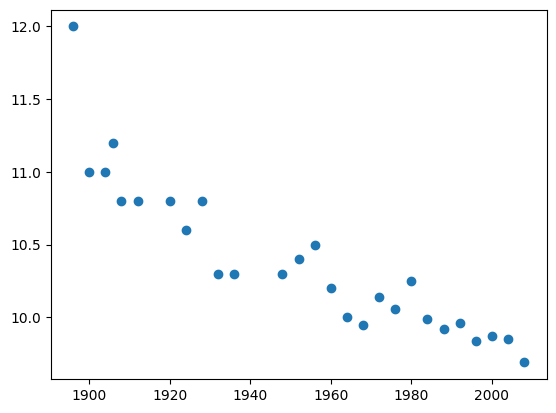

In [11]:
plt.scatter(x,y)

In [12]:
N=10000


In [13]:
tet_ini=np.array([0,0])
sig1=0.1
sig2=0.3
T_min0, T_max0= -40,40
T_min1, T_max1= -40,40

In [14]:
Tethas = Eval(N,y,X_norm,tet_ini,sig1,sig2,T_min0, T_max0, T_min1, T_max1)

In [15]:
Graf = Tethas.T

In [16]:
Tethas2 = Eval(N,y,X_norm,[20,2],sig1,sig2,T_min0, T_max0, T_min1, T_max1)
Graf2 = Tethas2.T

In [17]:
Tethas3 = Eval(N,y,X_norm,[12,5],sig1,sig2,T_min0, T_max0, T_min1, T_max1)
Graf3 = Tethas3.T

In [20]:
Tethas4 = Eval(N,y,X_norm,[12,-5],sig1,sig2,T_min0, T_max0, T_min1, T_max1)
Graf4 = Tethas4.T

In [21]:
Tethas5 = Eval(N,y,X_norm,[2.5,3.5],sig1,sig2,T_min0, T_max0, T_min1, T_max1)
Graf5 = Tethas5.T

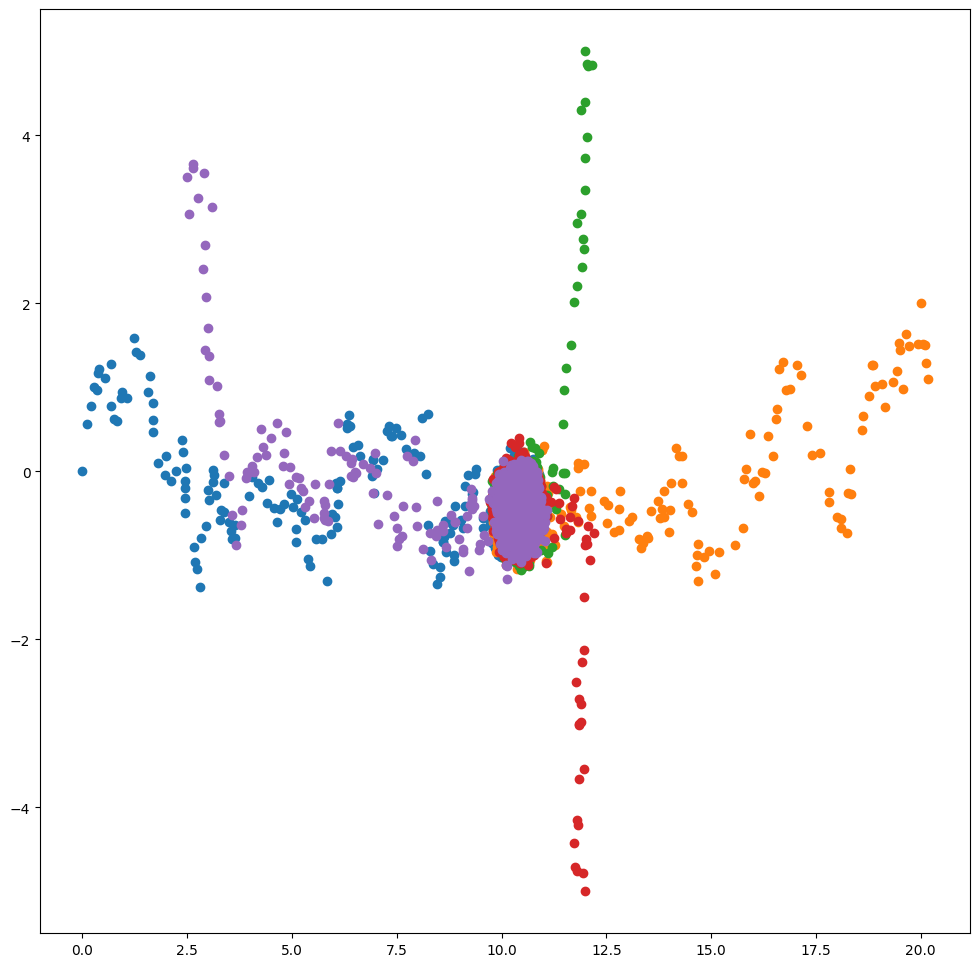

In [23]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(12)
plt.scatter(Graf[0],Graf[1])
plt.scatter(Graf2[0],Graf2[1])
plt.scatter(Graf3[0],Graf3[1])
plt.scatter(Graf4[0],Graf4[1])
plt.scatter(Graf5[0],Graf5[1])

(9.0, 12.0)

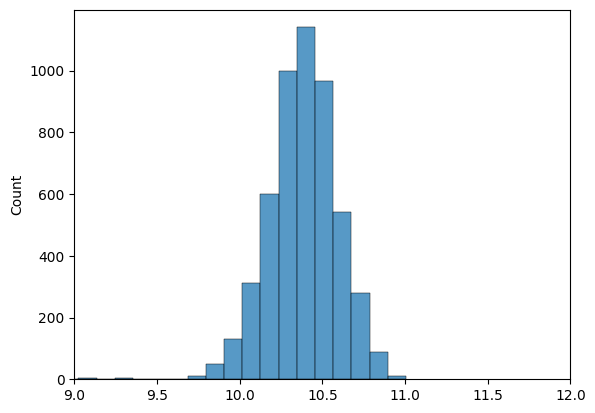

In [25]:
#Gráficos de tetha0
sns.histplot(Graf[0], bins=100)
plt.xlim(9, 12)

(-1.25, 0.5)

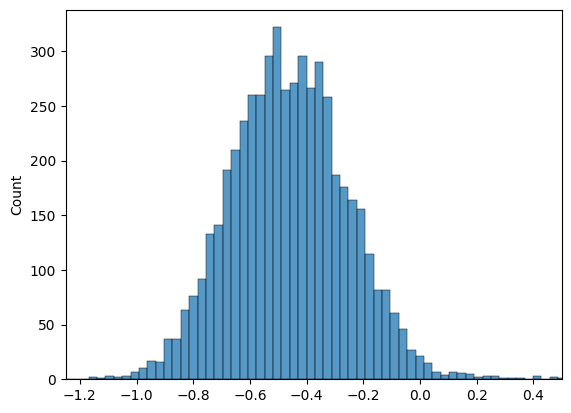

In [26]:
#Gráfico de tetha1
sns.histplot(Graf[1],bins=100)
plt.xlim(-1.25, 0.5)

Diagnostico de Gelman-Rubin

$S_{i}^2=\frac{1}{n-1}∑_{t=1}^n(X_{it}-\bar{X}_i)^2$

In [27]:
#Gelman-Rubin diagnostic usando el parámetro tetha0
def GelRub(Chain):
  suma=0
  for i in range(len(Chain[0])):
    suma += (Chain[0,i]-np.mean(Chain[0]))**2
  S_i=(1/(len(Chain[0])-1))*suma
  return S_i

$S^2=\frac{1}{m}\sum_{i=1}^ms_i^2$

In [28]:
S1 = GelRub(Graf)
S2 = GelRub(Graf2)
S3 = GelRub(Graf3)
S4 = GelRub(Graf4)
S5 = GelRub(Graf5)

In [29]:
SS=(1/5)*(S1+S2+S3+S4+S5)

In [30]:
SS

0.4623533747770758

In [32]:
#concatenamos para obtener la media general de un parámetro
Overall= np.concatenate((Graf[0],Graf2[0],Graf3[0],Graf4[0],Graf5[0]), axis=None)

In [33]:
Overall

array([ 0.        ,  0.11277196,  0.20035454, ..., 10.94651608,
       10.89316562, 10.95491687])

In [34]:
np.shape(Overall)

(26715,)

In [35]:
#Lista con las medias de las cadenas
mean=[np.mean(Graf[0]),np.mean(Graf2[0]),np.mean(Graf3[0]), np.mean(Graf4[0]), np.mean(Graf5[0])]

In [36]:
mean

[10.241905770829424,
 10.512977172831238,
 10.405148021981601,
 10.39394475600413,
 10.302727606147952]

$\frac{B}{N}=\frac{1}{m-1}\sum_{i=1}^m(\bar{X}_i-\hat{\mu})^2$

In [38]:
def B_N(means, Overall):
  Suma=0
  for i in range(4):
    Suma += (mean[i]-np.mean(Overall))**2
  B_N=(1/(5-1))*Suma
  return B_N

In [39]:
B_n = B_N(mean,Overall)

$\hat{\sigma}^2=\frac{n-1}{n}s^2+\frac{B}{n}$

In [40]:
def sigma(SS,B_N, n):
  sig=((n-1)/n)*SS+B_N
  return sig

In [41]:
sigma(SS,B_n,len(Graf[0]))

0.47186780999903455

$\hat{R} = \sqrt{\frac{\hat{\sigma}^2}{s^2}}$

In [42]:
R=np.sqrt(sigma(SS,B_n,len(Graf[0]))/SS)

In [43]:
R

1.0102367424078136